# Laptop Price Prediction

In this project I will prepare a prediction modelling for Laptop Prices based on their specifications. This dataset is taken from Kaggle. 

### Table of Contents:


1. Data Collection and Preparation
2. Exploratory Data Analysis
3. Data Manipulating
4. Feature Engineering
5. Model Selection and Training
6. Model Evaluation and Tuning
7. Final Model and Deployment

<img src='https://i.rtings.com/assets/pages/ZRskDBBI/best-laptop-brands-20230420-3-medium.jpg?format=auto' style='display: block; margin-left: auto; margin-right: auto;'>

<a href='https://www.kaggle.com/code/keerthivasankannan/price-prediction-on-laptops-using-machine-learning/notebook' target= _blank> Can get data from this link

### Data Collection and Preparation

In [1500]:
#Imports of required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import plotly.express as px 
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

import datetime

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler

from scipy.stats import ttest_ind

In [1501]:
#pip install xgboost

In [1502]:
df = pd.read_csv("laptop_data.csv")

### Exploratory Data Analysis

In [1503]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [1504]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [1505]:
df.shape

(1303, 12)

In [1506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [1507]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [1508]:
df.corr(numeric_only=True)

,Unnamed: 0,Inches,Price
Unnamed: 0,1.000000,-0.087936,0.067984
Inches,-0.087936,1.000000,0.068197
Price,0.067984,0.068197,1.000000


In [1509]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

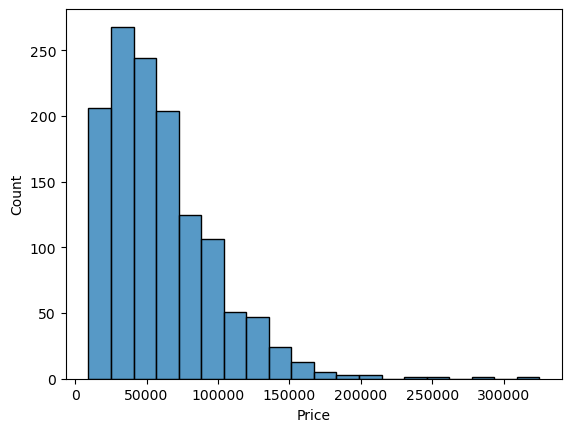

In [1510]:
sns.histplot(x = df["Price"], bins = 20);

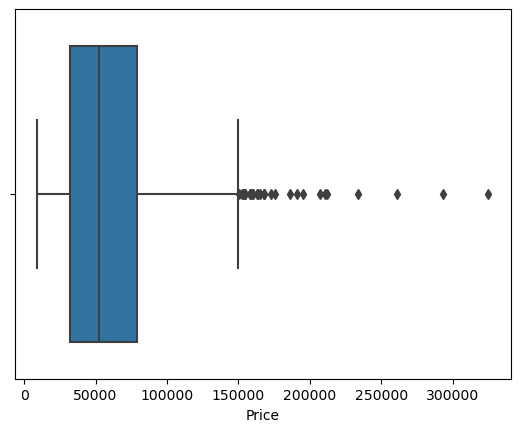

In [1511]:
sns.boxplot(x = df["Price"]);

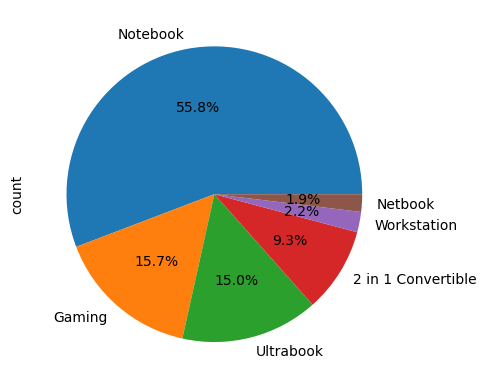

In [1512]:
df['TypeName'].value_counts().plot.pie(autopct = '%1.1f%%');

<Figure size 1200x600 with 0 Axes>

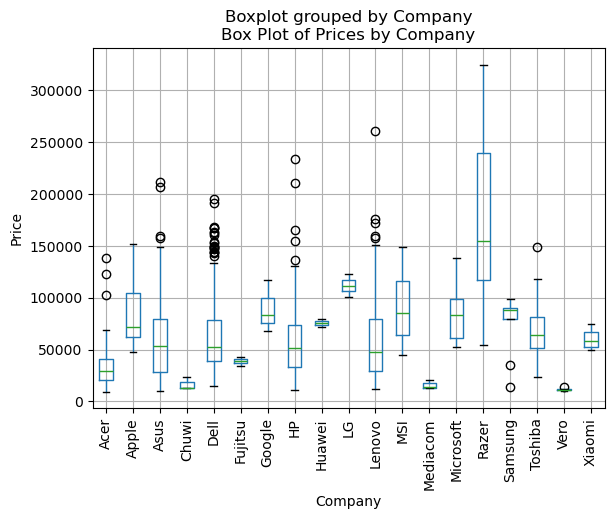

In [1513]:
plt.figure(figsize=(12, 6))
df.boxplot(column='Price', by='Company')
plt.title('Box Plot of Prices by Company')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x600 with 0 Axes>

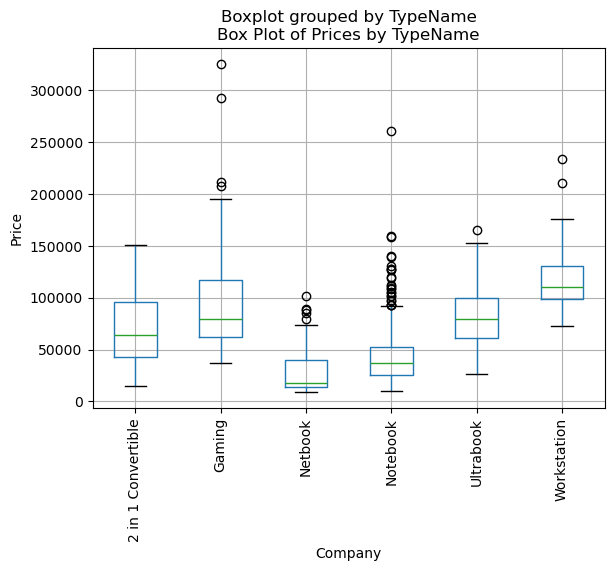

In [1514]:
plt.figure(figsize=(12, 6))
df.boxplot(column='Price', by='TypeName')
plt.title('Box Plot of Prices by TypeName')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x600 with 0 Axes>

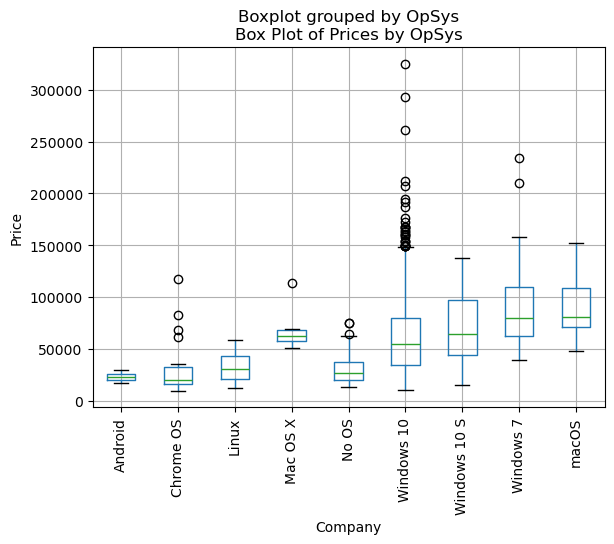

In [1515]:
plt.figure(figsize=(12, 6))
df.boxplot(column='Price', by='OpSys')
plt.title('Box Plot of Prices by OpSys')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

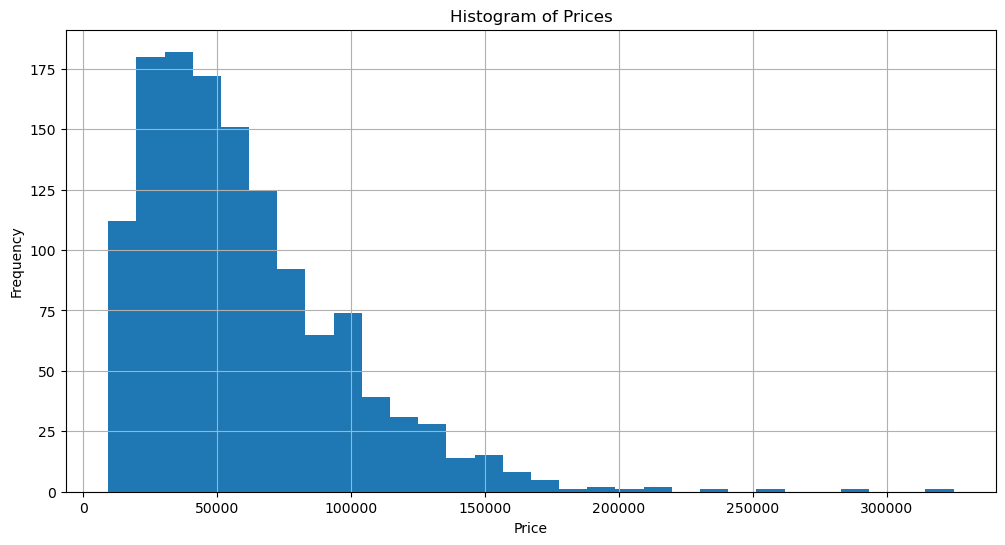

In [1516]:
plt.figure(figsize=(12, 6))
df['Price'].hist(bins=30)
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [1517]:
px.bar(df, x = 'Company', y = 'Price', color = 'TypeName')

In [1518]:
fig = px.sunburst(df, path= ['Company', 'TypeName', 'OpSys'], values = 'Price');
fig.show()

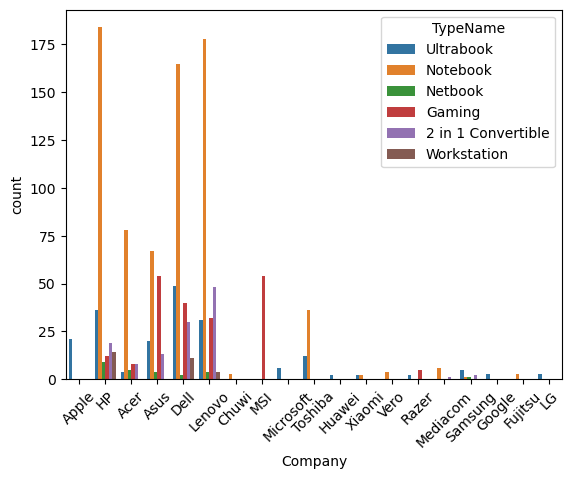

In [1519]:
sns.countplot(x= df['Company'], hue = df.TypeName);
plt.xticks(rotation = 45);

### Data Manipulating

In [1520]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [1521]:
#Drop useless columns
df = df.drop("Unnamed: 0", axis=1)

In [1522]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [1523]:
#Drop doubled rows
df.duplicated() # if exists any True check sums of them  
df.duplicated().sum() # drop duplicates
df.drop_duplicates()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200


In [1524]:
#Check for null values

df.isnull().sum() #if exists any null fill them with mean for integer cariables and median for categorical variables
#df.dropna()


Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [1525]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Feature Engineering

In [1526]:
#Analyze of columns for correlation and comments of decision 

df["ScreenResolution"].unique()
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [1527]:
#convert ScreenResolution column to new features
df[['Width', 'Height']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype(int)
df['IsIPS'] = df['ScreenResolution'].apply(lambda x: '1' if 'IPS' in x else '0')
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: '1' if 'touchscreen' in x.lower() else '0')
df['HD'] = df['ScreenResolution'].apply(lambda x: '1' if 'hd' in x.lower() else '0')
df['TotalPixels'] = df['Width'] * df['Height']

#drop old columns 
df = df.drop(["ScreenResolution", "Width", "Height"], axis=1)
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IsIPS,Touchscreen,HD,TotalPixels
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,0,4096000
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,1296000
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1,2073600
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,0,5184000
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,0,4096000


In [1528]:
df["Company"].unique() #create dummies

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

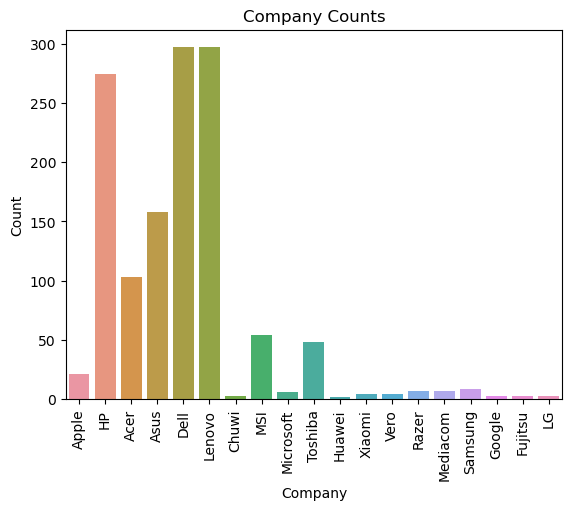

In [1529]:
sns.countplot(x='Company', data=df)
plt.xticks(rotation=90)
plt.title('Company Counts')
plt.xlabel('Company')
plt.ylabel('Count');

In [1530]:
df["TypeName"].unique() 

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

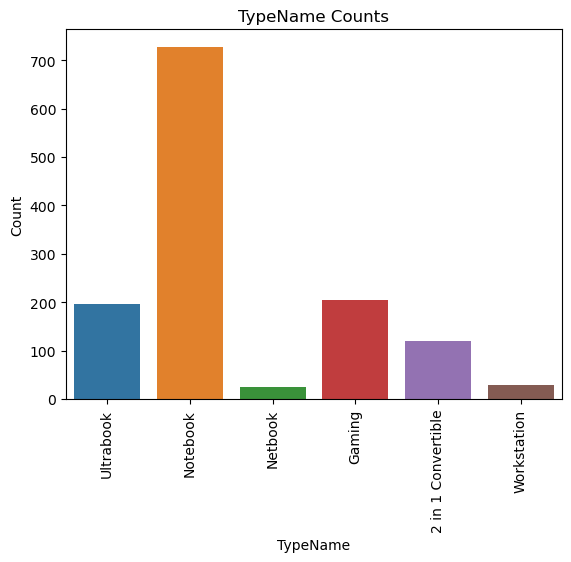

In [1531]:
sns.countplot(x='TypeName', data=df)
plt.xticks(rotation=90)
plt.title('TypeName Counts')
plt.xlabel('TypeName')
plt.ylabel('Count');

In [1532]:
df["Inches"].unique() #ready to correlation

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [1533]:
df["Cpu"].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [1534]:
# convert Cpu column to new features
df['CPU_brand'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
def processortype(text):
    
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel'
        
        else:
            return 'AMD'
        
    
    
df['CPU_brand'] = df['CPU_brand'].apply(lambda text:processortype(text))

# function to extract GHz
def extract_ghz(cpu):
    match = re.search(r'(\d+\.\d+|\d+)GHz', cpu)
    if match:
        return float(match.group(1))
    return None

# new column of GHz
df['GHz'] = df['Cpu'].apply(extract_ghz)

In [1535]:
df["CPU_brand"].value_counts()

CPU_brand
Intel Core i7    527
Intel Core i5    423
Other Intel      154
Intel Core i3    136
AMD               63
Name: count, dtype: int64

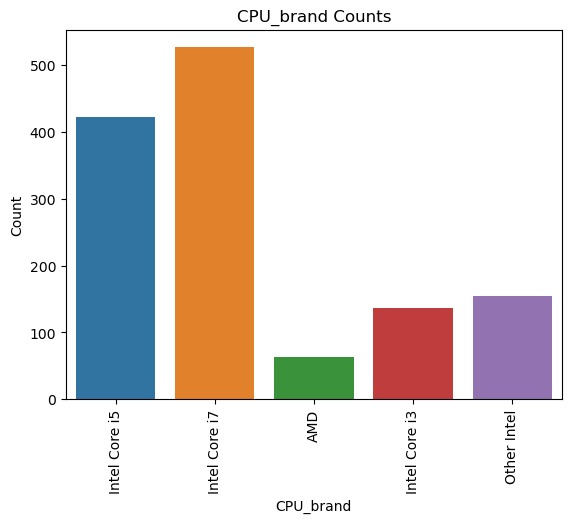

In [1536]:
sns.countplot(x='CPU_brand', data=df)
plt.xticks(rotation=90)
plt.title('CPU_brand Counts')
plt.xlabel('CPU_brand')
plt.ylabel('Count');

In [1537]:
#drop old columns 
df = df.drop(["Cpu"], axis=1)
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,IsIPS,Touchscreen,HD,TotalPixels,CPU_brand,GHz
0,Apple,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,0,4096000,Intel Core i5,2.3
1,Apple,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,1296000,Intel Core i5,1.8
2,HP,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1,2073600,Intel Core i5,2.5
3,Apple,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,0,5184000,Intel Core i7,2.7
4,Apple,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,0,4096000,Intel Core i5,3.1


In [1538]:
df["Ram"].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [1539]:
# convert Ram column to integer
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

In [1540]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,IsIPS,Touchscreen,HD,TotalPixels,CPU_brand,GHz
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,0,4096000,Intel Core i5,2.3
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,0,1296000,Intel Core i5,1.8
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1,2073600,Intel Core i5,2.5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,0,5184000,Intel Core i7,2.7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1,0,0,4096000,Intel Core i5,3.1


In [1541]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [1542]:
# convert Memory column to new features
values = df['Memory'].tolist()

left_column = []
right_column = []

for value in values:
    if ' + ' in value:
        left, right = value.split(' + ')
        left_column.append(left.strip())
        right_column.append(right.strip())
    else:
        left_column.append(value.strip())
        right_column.append('')  # No right value, so append an empty string

df['Left Column'] = left_column
df['Right Column'] = right_column

df['Left Column'] = df['Left Column'].str.replace('.0', '')
df['Right Column'] = df['Right Column'].str.replace('.0', '')

# Function to convert TB to GB
def convert_to_gb(value):
    if 'TB' in value:
        # Remove unnecessary characters around float and convert to integer
        cap_str = value.split('TB')[0].strip().replace('.', '').lstrip('0')
        if cap_str == '':
            cap_str = '0'
        cap = int(cap_str) * 1000
    elif 'GB' in value:
        cap = int(value.split('GB')[0].strip())
    else:
        cap = 0
    return cap

df['M1_cap'] = df['Left Column'].apply(convert_to_gb)
df['M1_type'] = df['Left Column'].apply(lambda x: ' '.join(x.split()[1:]) if x else '')

df['M2_cap'] = df['Right Column'].apply(convert_to_gb)
df['M2_type'] = df['Right Column'].apply(lambda x: ' '.join(x.split()[1:]) if x else '')



In [1543]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,IsIPS,Touchscreen,HD,TotalPixels,CPU_brand,GHz,Left Column,Right Column,M1_cap,M1_type,M2_cap,M2_type
664,MSI,Gaming,17.3,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.7kg,79215.1056,0,0,1,2073600,Intel Core i7,2.8,128GB SSD,1TB HDD,128,SSD,1000,HDD
1185,Asus,Gaming,15.6,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.591kg,48431.5200,1,0,1,2073600,Intel Core i7,2.6,256GB SSD,1TB HDD,256,SSD,1000,HDD
1229,MSI,Gaming,15.6,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.2kg,61218.7200,0,0,1,2073600,Intel Core i7,2.8,128GB SSD,1TB HDD,128,SSD,1000,HDD
140,Acer,Notebook,17.3,4,1TB HDD,Nvidia GeForce MX130,Windows 10,3kg,34898.4000,1,0,1,2073600,Intel Core i3,2.7,1TB HDD,,1000,HDD,0,
390,Asus,Gaming,17.3,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3kg,55357.9200,0,0,1,2073600,Intel Core i7,2.8,1TB HDD,,1000,HDD,0,


In [1544]:
df['M2_type'] = np.where(df['M2_type'].isin(['HDD', 'SSD', 'Hybrid']), df['M2_type'], 0)

In [1545]:
df = df.drop(["Memory", "Left Column", "Right Column", ], axis=1)
df.sample(2)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,IsIPS,Touchscreen,HD,TotalPixels,CPU_brand,GHz,M1_cap,M1_type,M2_cap,M2_type
329,Dell,Notebook,15.6,32,Nvidia GeForce GTX 1050,Windows 10,2.06kg,140605.9200,0,1,1,8294400,Intel Core i7,2.8,1000,SSD,0,0
686,HP,Notebook,15.6,4,AMD Radeon 520,Windows 10,1.86kg,32639.8608,0,0,0,1049088,Intel Core i5,2.5,500,HDD,0,0


In [1546]:
df["Gpu"].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [1547]:

#convert Gpu column to new feature
df['Gpu_brand'] = df['Gpu'].str.split().str[0]

In [1548]:
df.Gpu_brand.value_counts()

Gpu_brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [1549]:
df = df[df['Gpu_brand']!='ARM']

In [1550]:
df = df.drop(["Gpu"], axis=1)

In [1551]:
df["OpSys"].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [1552]:
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [1553]:
#convert OpSys column to new feature
def systemchooser(text):
    
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    
    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'
    
    elif text=='No OS':
        return 'FreeDos'
    
    else:
        return 'Other'
    
    
df['OpSys'] = df['OpSys'].apply(lambda x:systemchooser(x))

In [1554]:
df["OpSys"].value_counts()

OpSys
Windows    1125
Other        90
FreeDos      66
Mac          21
Name: count, dtype: int64

In [1555]:
df["Weight"].unique() #drop kg and make integer

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [1556]:
#convert Weight to float
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)


In [1557]:
df.sample(5)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,IsIPS,Touchscreen,HD,TotalPixels,CPU_brand,GHz,M1_cap,M1_type,M2_cap,M2_type,Gpu_brand
339,Dell,Notebook,15.6,8,Windows,2.00,60885.7200,0,0,1,2073600,Intel Core i5,1.6,256,SSD,0,0,Nvidia
1272,Lenovo,Notebook,14.0,2,Windows,1.50,12201.1200,0,0,0,1049088,Other Intel,1.6,64,Flash Storage,0,0,Intel
815,Lenovo,Ultrabook,14.0,8,Windows,1.32,99047.5200,0,0,1,2073600,Intel Core i7,2.7,256,SSD,0,0,Intel
12,Apple,Ultrabook,15.4,16,Mac,1.83,130001.6016,1,0,0,5184000,Intel Core i7,2.8,256,SSD,0,0,AMD
1275,Asus,Ultrabook,13.3,8,Windows,1.20,38841.1200,1,0,1,2073600,Other Intel,0.9,512,SSD,0,0,Intel


In [1558]:
df.isnull().sum() 
#df.sample(3)

Company        0
TypeName       0
Inches         0
Ram            0
OpSys          0
Weight         0
Price          0
IsIPS          0
Touchscreen    0
HD             0
TotalPixels    0
CPU_brand      0
GHz            0
M1_cap         0
M1_type        0
M2_cap         0
M2_type        0
Gpu_brand      0
dtype: int64

In [1499]:
# Analysis of Outliers 
# (Addition of new columns in the feature engineering step causes taking analysis of outlier into this step)

df.describe()

,Inches,Ram,Weight,Price,TotalPixels,GHz,M1_cap,M2_cap
count,1065.000000,1065.000000,1065.000000,1065.000000,1.065000e+03,1065.000000,1065.000000,1065.000000
mean,14.889014,46.629108,1.939202,48711.946898,6.408089e+08,5.258065,449.487324,91.800939
std,1.372851,27.510738,0.501302,25378.123206,4.378511e+08,2.119053,375.240449,300.144836
min,10.100000,4.000000,0.690000,9270.720000,-1.973158e+09,0.810000,8.000000,0.000000
25%,14.000000,16.000000,1.500000,28984.320000,5.546967e+08,3.240000,256.000000,0.000000
50%,15.600000,64.000000,2.000000,44275.680000,5.546967e+08,6.250000,256.000000,0.000000
75%,15.600000,64.000000,2.200000,63456.480000,1.074004e+09,6.760000,512.000000,0.000000
max,17.300000,144.000000,4.420000,137995.200000,2.099511e+09,12.960000,2000.000000,2000.000000


<Axes: >

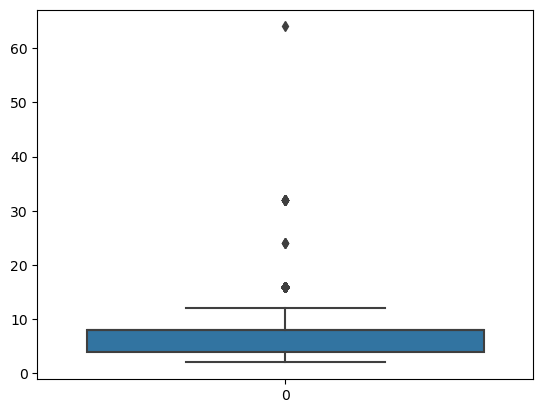

In [1489]:
sns.boxplot(df["Ram"])

In [1490]:
#Dropping outliers
outliers = df.quantile(q = .97, numeric_only = True)
df = df[(df["Ram"] < outliers["Ram"])]
df = df[(df["TotalPixels"] < outliers["TotalPixels"])]
df = df[(df["Price"] < outliers["Price"])]

In [1491]:
df.corr(numeric_only=True)["Price"].sort_values(ascending=False)

Price          1.000000
Ram            0.600034
TotalPixels    0.487150
GHz            0.393817
M2_cap         0.142849
Inches        -0.183651
Weight        -0.199654
M1_cap        -0.215473
Name: Price, dtype: float64

In [1492]:
# Continue to feature engineering
df["Ram"] = df["Ram"]**2
df["GHz"] = df["GHz"]**2
df["TotalPixels"] = df["TotalPixels"]**2

In [1559]:
abs(df.corr(numeric_only=True)["Price"]).sort_values(ascending=False)

Price          1.000000
Ram            0.742905
TotalPixels    0.516474
GHz            0.430122
M2_cap         0.294860
Weight         0.209867
M1_cap         0.123038
Inches         0.067329
Name: Price, dtype: float64

<Axes: >

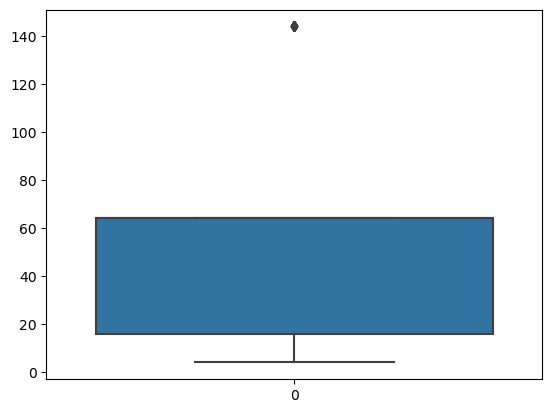

In [1494]:
sns.boxplot(df["Ram"])# exists outliers

<Axes: >

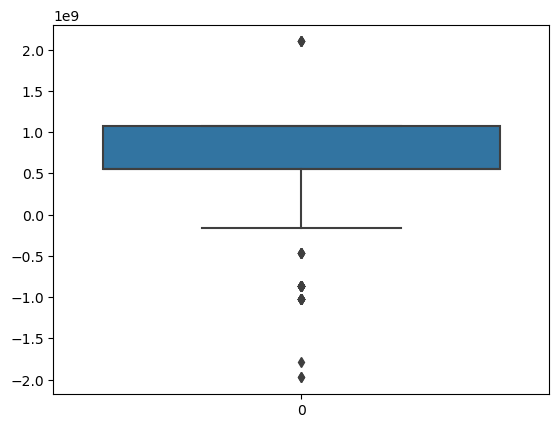

In [1495]:
sns.boxplot(df["TotalPixels"])# exists outliers

<Axes: >

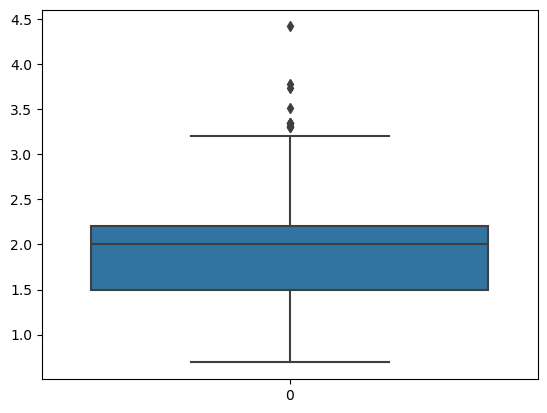

In [1497]:
sns.boxplot(df["Weight"])# too many outliers

<Axes: >

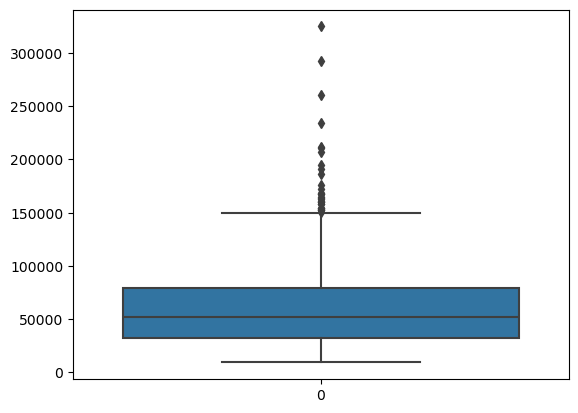

In [411]:
sns.boxplot(df["Price"])# too many outliers

<Axes: >

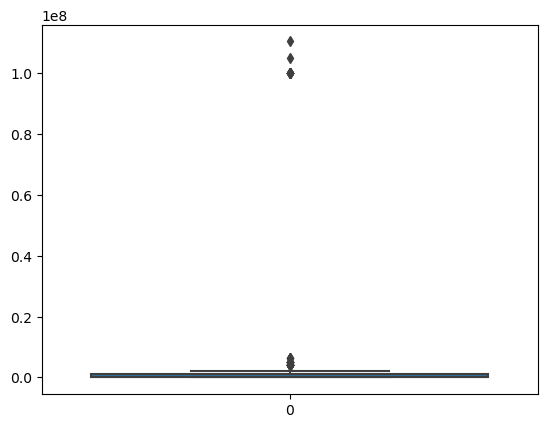

In [412]:
sns.boxplot(df["TotalMem_cap"])# exists outliers

In [1560]:
# determine x and y for model
x = df.drop(['Price'], axis=1)
y = df['Price']

In [1561]:
# It is used to convert categorical variables into binary variables in the pandas data frame
x = pd.get_dummies(x, drop_first=True)

In [1562]:
#divide the data to train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =.2, random_state= 42)

### Modelling

In [1563]:
def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [1564]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,8.494065e-01,1.466847e+04,9.188248e+03
Gradient Boosting,8.398371e-01,1.512734e+04,1.042314e+04
Decision Tree,7.772874e-01,1.783832e+04,1.125077e+04
Lasso,7.522189e-01,1.881549e+04,1.300142e+04
Linear,7.521411e-01,1.881845e+04,1.301295e+04
Ridge,7.516845e-01,1.883577e+04,1.302429e+04
AdaBoost,7.055003e-01,2.051276e+04,1.334429e+04
Extra Tree,6.921540e-01,2.097241e+04,1.270212e+04
ElasticNet,6.842958e-01,2.123840e+04,1.570681e+04
KNeighborsRegressor,6.291147e-01,2.301979e+04,1.956186e+04


### Feature Importance

In [1595]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.20, random_state=42)
L=LinearRegression()
L.fit(x_train, y_train)
L_pred = L.predict(x_test)
r2 = r2_score(y_test, L_pred)
m = mean_squared_error(y_test, L_pred)**.5
print("RMSE is: " , m, "\nand r2_score is: ", round(r2,3))


RMSE is:  18818.447964942563 
and r2_score is:  0.752


In [1596]:
L.coef_

array([-1.49098271e+03,  2.97346881e+03,  9.97496702e+03,  4.45044961e-03,
        9.81050776e+03,  6.41780445e+00, -4.35940709e+00,  1.10161171e+04,
        4.28231058e+03, -6.90120987e+03,  7.03818092e+03, -7.78014500e+03,
        2.71767686e+04,  1.10731186e+04,  1.51959219e+03,  4.08399376e+04,
        7.37511849e+03,  1.43782379e+04, -6.96882087e+03,  1.67943636e+04,
        6.33449563e+04,  1.26765726e+04,  1.37094434e+04,  1.92796886e+02,
        3.34224959e+03, -1.47583369e+04, -1.19711461e+04, -1.73859952e+04,
        2.27145146e+03,  3.16666125e+04,  1.10161171e+04,  5.55264158e+03,
        1.17319791e+04,  1.55283341e+03, -6.96427925e+03, -3.13047710e+03,
        5.66140541e+03,  1.25511584e+04,  1.48502105e+04,  1.12957374e+04,
       -4.68933367e+03, -5.82634886e+03,  9.46285168e+03,  6.95220707e+03,
        2.94764426e+04, -1.69680809e+04,  8.87861952e+03,  3.50275657e+03])

In [1598]:
x_train

,Inches,Ram,Weight,TotalPixels,GHz,M1_cap,M2_cap,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,OpSys_Mac,OpSys_Other,OpSys_Windows,IsIPS_1,Touchscreen_1,HD_1,CPU_brand_Intel Core i3,CPU_brand_Intel Core i5,CPU_brand_Intel Core i7,CPU_brand_Other Intel,M1_type_HDD,M1_type_Hybrid,M1_type_SSD,M2_type_HDD,M2_type_Hybrid,M2_type_SSD,Gpu_brand_Intel,Gpu_brand_Nvidia
147,15.6,4,2.00,2073600,1.10,1000,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,True,False,False,False,False,False,True,False
342,15.6,8,2.10,2073600,2.40,1000,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,True,False,False,False,True,False,False,False,False,False,False,True
1003,14.0,4,1.64,1049088,2.50,500,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False
814,15.6,8,2.18,2073600,2.50,256,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
344,13.3,8,1.20,2073600,1.80,256,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,15.6,8,2.40,2073600,2.50,256,1000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,True
1130,15.6,8,2.04,1049088,2.70,2000,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False
1295,15.6,8,2.30,1049088,2.70,1000,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False
860,15.6,8,2.30,2073600,2.50,1000,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False


In [1599]:
feature_importance = pd.DataFrame({"Feature" :x_train.columns, "Coefs": L.coef_})

In [1600]:
feature_importance

,Feature,Coefs
0,Inches,-1490.982708
1,Ram,2973.468808
2,Weight,9974.967022
3,TotalPixels,0.004450
4,GHz,9810.507761
5,M1_cap,6.417804
6,M2_cap,-4.359407
7,Company_Apple,11016.117091
8,Company_Asus,4282.310585
9,Company_Chuwi,-6901.209874


In [1601]:
feature_importance = feature_importance.sort_values(by = 'Coefs',ascending=False)

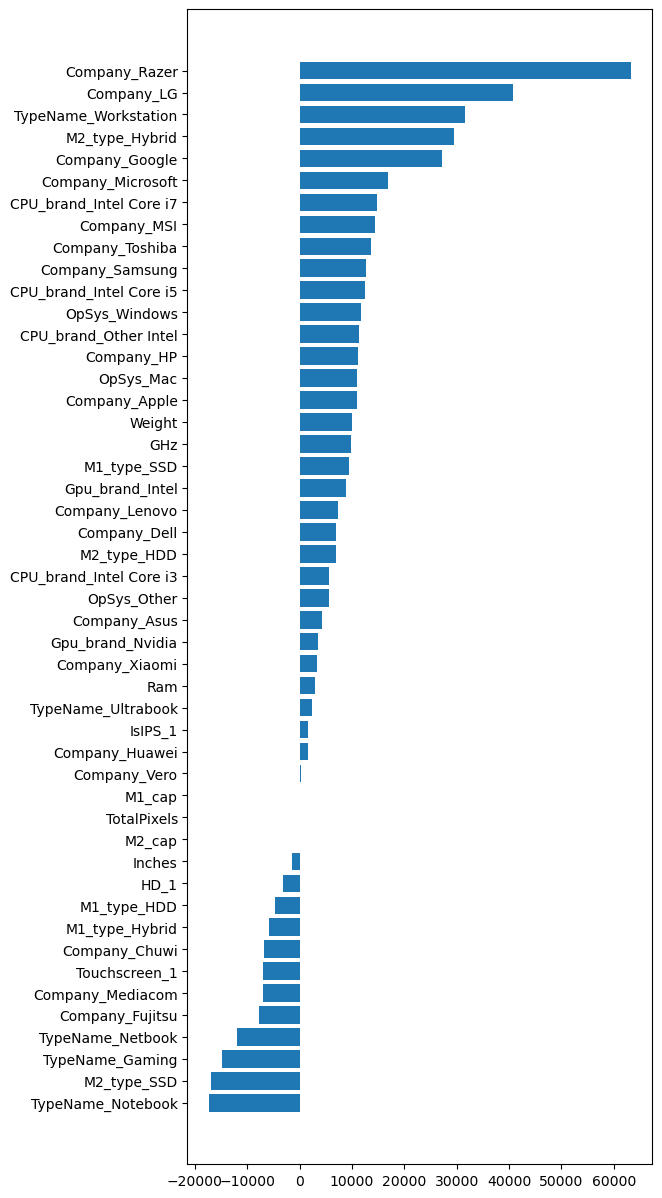

In [1602]:
plt.figure(figsize=(6,15))
plt.barh(feature_importance["Feature"], feature_importance["Coefs"])
plt.gca().invert_yaxis()

In [1603]:
residuals = y_test - L_pred
residuals

478      1798.067461
724     -3462.524305
312      6830.951142
851     15627.667796
1276   -13169.182472
            ...     
199      -122.338822
296      1268.458957
286     -6460.370821
997      4937.549666
10      -3266.647393
Name: Price, Length: 261, dtype: float64

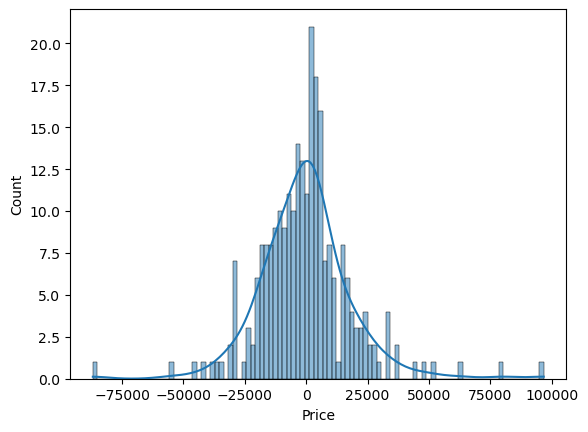

In [1604]:
sns.histplot(residuals, kde = True, bins = 100);

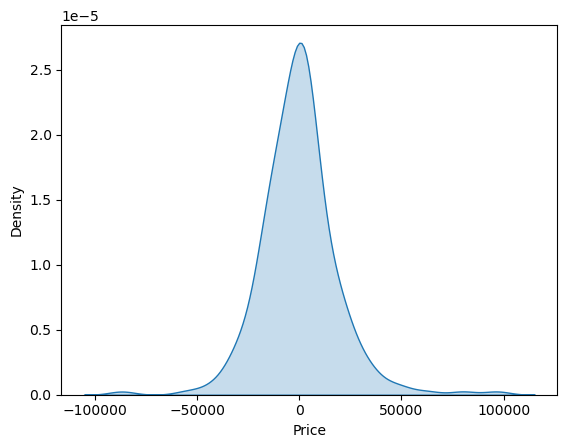

In [1605]:
sns.kdeplot(x = residuals, fill=True);

Result: r2 = % 85 <br>
RMSE = 14,668.47 $ <br>
residuals are distrubuted normally<br>
<br>
So mission is accomplished successfully.